In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score 
import seaborn as sns
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix



In [79]:
#importando os dados csv e alterando os nomes da coluna
df = pd.read_csv('dados_produtos.csv', sep=',')
df.head(10)
dic = {'product_name' : 'Produto', 'rating' : 'Nota', 'rating_count' : 'Qtd. Notas', 'purchased' : 'Compras'}
df.rename(columns=dic, inplace=True)
df.head()

,Produto,Nota,Qtd. Notas,Compras
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [80]:
#variáveis que buscam colunas específicas para a criação do boxplot
produto = df['Produto']
nota = df['Nota']
notaGeral = df['Qtd. Notas']

Text(0, 0.5, 'Notas dos produtos')

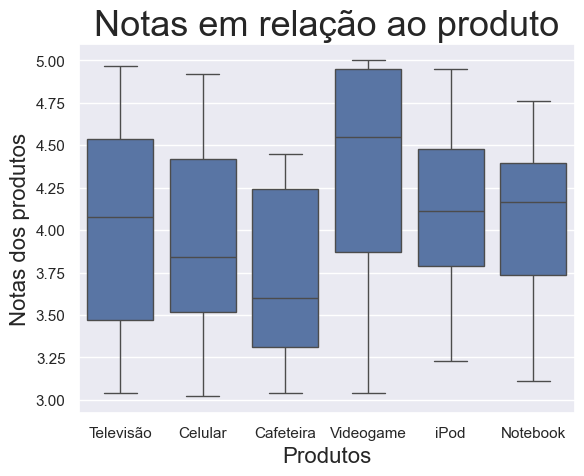

In [81]:
# Criação do Boxplot
sns.boxplot(y = nota, x = produto)
sns.set(font_scale = 1)
plt.title('Notas em relação ao produto', fontsize = 26)
plt.xlabel('Produtos', fontsize = 16)
plt.ylabel('Notas dos produtos', fontsize = 16)


In [82]:
# Tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Produto     100 non-null    object 
 1   Nota        100 non-null    float64
 2   Qtd. Notas  100 non-null    int64  
 3   Compras     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [83]:
df.describe()

,Nota,Qtd. Notas,Compras
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [84]:

df.isnull().sum()

Produto       0
Nota          0
Qtd. Notas    0
Compras       0
dtype: int64

In [85]:
col_n = df.select_dtypes(include=['number']) #Busca apenas valores numericos

In [86]:
correl = col_n.corr() #Faz a correlação
correl

,Nota,Qtd. Notas,Compras
Nota,1.000000,0.051993,0.032637
Qtd. Notas,0.051993,1.000000,0.129694
Compras,0.032637,0.129694,1.000000


<Axes: >

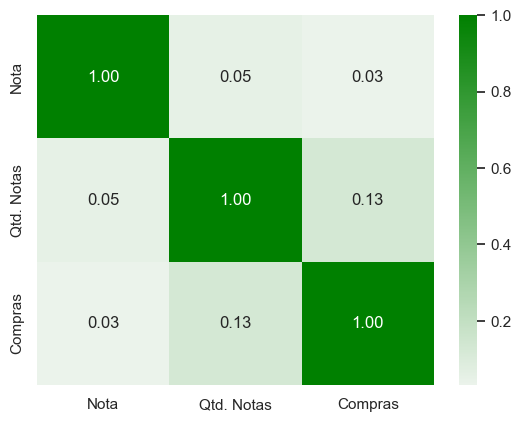

In [87]:
color = sns.color_palette('light:green', as_cmap=True)
sns.heatmap(correl, cmap=color, fmt='.2f', annot=True)

In [88]:
#Retornando quantidade e porcentagem de compras

numCompras = df['Compras'].count()
numComprasFeitas = df['Compras'].sum()
numComprasNfeitas = (numCompras - numComprasFeitas)
print(f'Número de compras: {numCompras}')
print(f'Número de compras feitas: {numComprasFeitas}')
print(f'Número de compras não feitas: {numComprasNfeitas}')
print('-' * 100)
porcCompras = (numComprasFeitas / numCompras) *100
porcComprasNfeitas = (numComprasNfeitas / numCompras) * 100
print(f'Porcentagem de compras feitas: {porcCompras}')
print(f'Porcentagem de compras não realizadas: {porcComprasNfeitas}')

Número de compras: 100
Número de compras feitas: 55
Número de compras não feitas: 45
----------------------------------------------------------------------------------------------------
Porcentagem de compras feitas: 55.00000000000001
Porcentagem de compras não realizadas: 45.0


In [89]:
#transformando em arrays

compra = df['Compras']
notas = nota.array
compras = compra.array
qtdnota = df['Qtd. Notas']
qtdnotas = qtdnota.array
print(notas)
print(compras)

<NumpyExtensionArray>
[3.04, 3.46, 3.25, 3.77,  5.0, 3.98,  3.5, 4.76, 3.94, 4.68, 4.43, 3.14, 4.42,
 3.14, 3.62,  4.1, 3.93, 4.61, 4.18, 3.11, 4.24, 4.95, 4.49,  3.6, 4.92, 3.12,
 4.89, 3.76, 3.76, 4.94, 3.02, 4.12, 3.23, 4.45, 4.08,  4.0, 3.31, 3.04,  4.8,
 4.31, 3.82, 3.45, 3.05, 3.69, 3.45, 4.98, 4.96, 3.75,  5.0, 3.39, 3.33, 4.95,
  4.8, 4.24, 4.97, 4.23, 4.68, 3.51, 3.16, 4.99, 4.24, 3.49, 4.11, 4.68, 4.39,
 3.71, 4.55, 3.52, 4.47, 4.23, 4.01, 4.67, 3.79, 3.04, 3.44, 3.78, 3.87, 3.69,
  4.6, 4.42, 3.38, 4.33, 3.81, 4.36, 4.29, 4.14, 4.12,  3.7, 4.81, 3.84, 3.99,
 4.64, 4.35, 4.15, 4.78, 4.44, 4.66, 4.33,  3.3, 4.08]
Length: 100, dtype: float64
<NumpyExtensionArray>
[1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0]
Length: 100, dty

In [90]:
# #criando modelos de teste

# notas_treino, notas_teste, compra_treino, compra_teste = train_test_split(notas.reshape(-1,1), compras.reshape(-1,1), test_size = 0.2, random_state= 42) # reshape, organizar o dataframe 


# modelo = DecisionTreeClassifier()
# modelo.fit(notas_treino, compra_treino)

# fig = plt.figure(figsize=(50,20))
# tree.plot_tree(modelo,feature_names= notas.tolist(), class_names = compras.tolist(), filled= True)

In [91]:
# #Calculando as métricas de precisão
# previsoes = modelo.predict(notas_teste)
# print(notas_teste)

# accuracy = accuracy_score(compra_teste, previsoes)
# print(accuracy)


In [92]:
products = df['Produto'].unique()

for product in products:

    print(f'\n--------- Árvore de Decisão do Produto {product} --------------')

    product_df = df.loc[df['Produto'] == product]

    x = product_df.drop(['Compras', 'Produto'], axis = 1)
    y = product_df['Compras']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier
    model = dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)

    print('Avaliação do Modelo: \n')
    print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

    print('\nVisualização da Árvore: ')

    product_df['Compras'] = product_df['Compras'].replace([1, 0], ['Comprou', 'Não comprou'])

    fig = plt.figure(figsize=(10,8))

    tree.plot_tree(model, feature_names=product_df['Nota'].tolist(), class_names=product_df['Compras'].tolist(), filled=True)
    plt.title(f'Arvore decisao - {product}')


--------- Árvore de Decisão do Produto Televisão --------------


AttributeError: 'DataFrame' object has no attribute '_validate_params'